# To understand how consumer attributes and loan attributes influence the tendency of default
## Prepared By Sai Kumar Neelam and Vishal Kumar Soni

### Import all necessary libraries

In [1]:
import pandas as pd             # helps multiple operations on dataframes
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt # helps in data visualization
import seaborn as sns           # helps in data visualization

In [2]:
# Reading the csv file using read_csv with low_memory set to False(due to more mixed types columns)
loan = pd.read_csv("./loan.csv",low_memory=False)
loan                  # Inspecting dataframe

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data Understanding

Reading all columns and identify which columns are needs to consider for the analysis. column names are mapped with the provided Data Dictionary.

In [3]:
# executing below command results the columns present in the dataframe
list(loan.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_

## Data Cleaning and Manipulation

1. Find the shape of dataframe such as number of rows and columns.
2. Finding the columns that are completely null.
3. Removing columns that are completely null
4. Identifying the columns that are not useful such as id, member_id,zip_code,etc.
5. Creating the defaulter dataframe with useful columns. Defaulter dataframe is identified with loan_status="Charged Off".
6. Manipulating the columns by removing special characters such as '%' and converting the datatype from string to float.

In [4]:
# finding the shape of dataframe
loan.shape

(39717, 111)

In [5]:
# finding the columns that have null values
loan.isna().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
# removing columns those have all null values.
loan.dropna(axis=1,how='all',inplace=True)

In [7]:
# Inspecting the dataframe
loan

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [8]:
# creating the dataframe with loan_status is Charged Off
ChargedOffData = loan[loan['loan_status']=='Charged Off']
ChargedOffData

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,Aug-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,Mar-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12,1064687,1298717,9000,9000,9000.0,36 months,13.49%,305.38,C,C1,...,NaN,Nov-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
14,1069057,1303503,10000,10000,10000.0,36 months,10.65%,325.74,B,B2,...,NaN,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39667,118823,118026,2500,2500,675.0,36 months,12.80%,84.00,D,D4,...,NaN,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0
39668,118533,117783,2500,2500,825.0,36 months,9.64%,80.26,B,B4,...,NaN,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0
39669,118523,118519,6500,6500,225.0,36 months,15.01%,225.37,F,F1,...,NaN,May-16,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0
39678,113179,113093,1000,1000,950.0,36 months,10.59%,32.55,C,C2,...,NaN,Oct-09,NaN,1,INDIVIDUAL,0,NaN,0,NaN,0.0


In [9]:
# Creating a dataframe with only useful columns for analysis
Defaulter = ChargedOffData[['loan_amnt','funded_amnt_inv','term','int_rate','installment','grade','home_ownership','annual_inc','verification_status','purpose','dti','revol_bal','revol_util']]

# as int_rate and revol_util are the percentages, need to convert them to float for later analysis
Defaulter['int_rate'] = Defaulter['int_rate'].str.replace("%","")
Defaulter['revol_util'] = Defaulter['revol_util'].str.replace("%","")
Defaulter['int_rate']= Defaulter['int_rate'].astype(float)
Defaulter['revol_util'] = Defaulter['revol_util'].astype(float)

In [10]:
#inspect and print the shape of dataframe
print(Defaulter)
print(Defaulter.shape)


       loan_amnt  funded_amnt_inv        term  int_rate  installment grade  \
1           2500           2500.0   60 months     15.27        59.83     C   
8           5600           5600.0   60 months     21.28       152.39     F   
9           5375           5350.0   60 months     12.69       121.45     B   
12          9000           9000.0   36 months     13.49       305.38     C   
14         10000          10000.0   36 months     10.65       325.74     B   
...          ...              ...         ...       ...          ...   ...   
39667       2500            675.0   36 months     12.80        84.00     D   
39668       2500            825.0   36 months      9.64        80.26     B   
39669       6500            225.0   36 months     15.01       225.37     F   
39678       1000            950.0   36 months     10.59        32.55     C   
39688      20000           2800.0   36 months     13.43       678.08     E   

      home_ownership  annual_inc verification_status           

## Data Analysis - Univariate Analysis

verification_status
Not Verified       2142
Verified           2051
Source Verified    1434
Name: count, dtype: int64


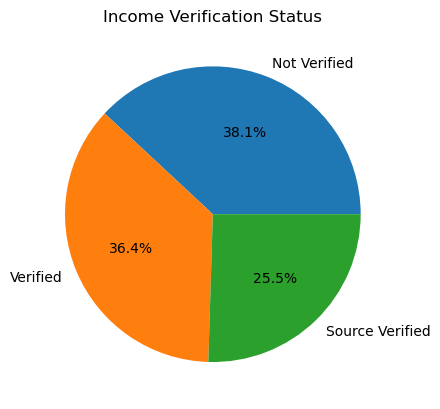

In [11]:
print(Defaulter['verification_status'].value_counts())
verification_status = Defaulter['verification_status'].value_counts()
plt.pie(verification_status,labels=verification_status.index,autopct='%1.1f%%')
plt.title('Income Verification Status')
plt.show()

We have Identified that there are more number of loan applicants whose Income source are not verified and found that there is no major difference between Verified and Not Verified status.

purpose
debt_consolidation    2767
other                  633
credit_card            542
small_business         475
home_improvement       347
major_purchase         222
car                    160
medical                106
wedding                 96
moving                  92
house                   59
educational             56
vacation                53
renewable_energy        19
Name: count, dtype: int64


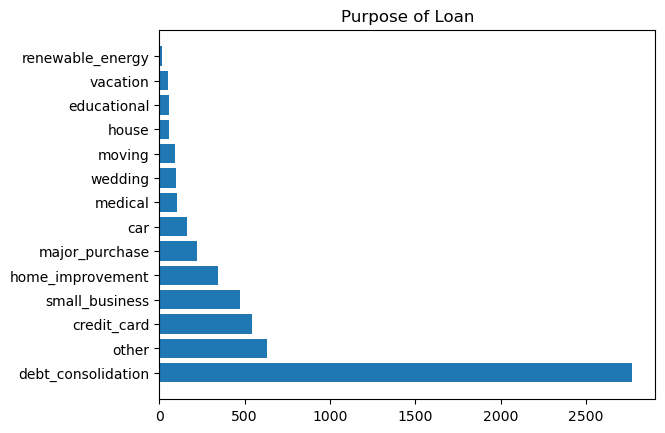

In [12]:
print(Defaulter['purpose'].value_counts())
purpose = Defaulter['purpose'].value_counts()
plt.barh(purpose.index,purpose.values)
plt.title('Purpose of Loan')
plt.show()

We have taken **purpose** of loan into consideration and identified that major loans are taken for debt_consolidation and are part of defaulters.

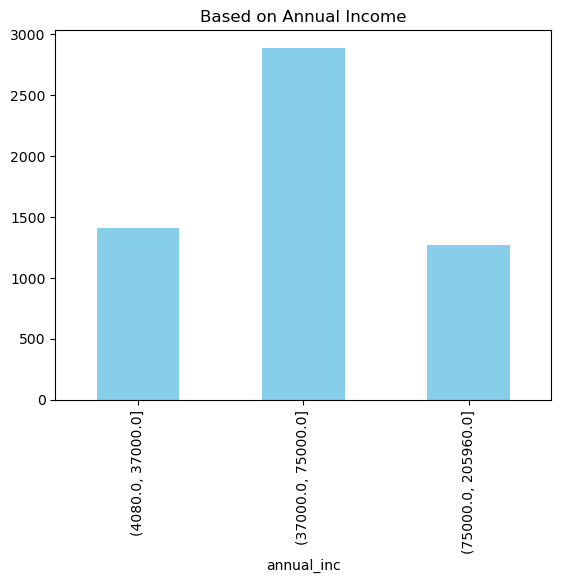

In [13]:
# create a buckets with annual_inc quantiles from 0-0.99 as 1 is idenitifed as outlier
bins = [Defaulter['annual_inc'].quantile(0),Defaulter['annual_inc'].quantile(0.25),Defaulter['annual_inc'].quantile(0.75),Defaulter['annual_inc'].quantile(0.99)]

#segregate the data based on the bins ranges
salary_buckets = pd.cut(Defaulter['annual_inc'],bins=bins).value_counts().sort_index()

#plot the bar with the data
salary_buckets.plot(kind='bar', color='skyblue')
plt.title('Based on Annual Income')
plt.show()

We have identifed an outlier based on annual_inc which is at 100 percentile when compared with 99 percentile.
We plotted a bar graph between ranges of annual_inc and defaulters comes under the range. We have observed that persons earning between 37000 and 75000 are more likely to be defaulters.

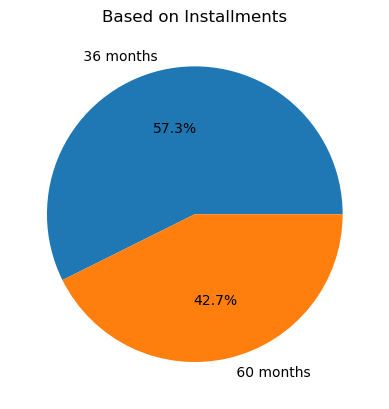

In [14]:
terms = Defaulter['term'].value_counts()
plt.pie(terms.values,labels=terms.index,autopct='%1.1f%%')
plt.title('Based on Installments')
plt.show()

We have taken **term** into consideration and identified applicants who have opted for loans having short terms are more likely to be defaulters.

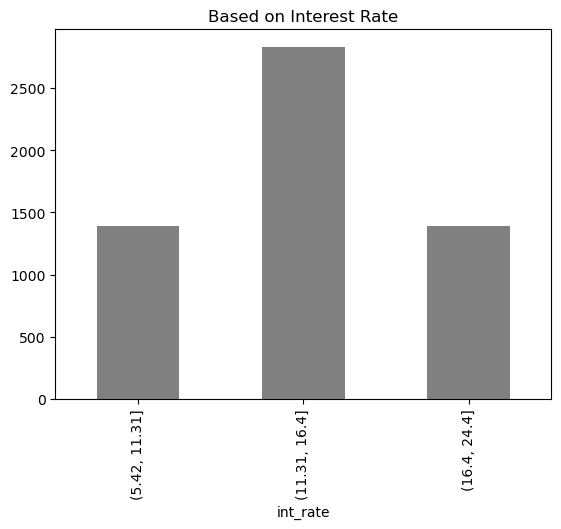

In [15]:
#creating bins for analysing data based on ranges
bins = [Defaulter['int_rate'].quantile(0),Defaulter['int_rate'].quantile(0.25),Defaulter['int_rate'].quantile(0.75),Defaulter['int_rate'].quantile(1)]
int_rate_buckets = pd.cut(Defaulter['int_rate'],bins=bins)

# creating one more column int_rate_buckets for future use
Defaulter['int_rate_buckets']=int_rate_buckets

int_rate_buckets = int_rate_buckets.value_counts().sort_index()
int_rate_buckets.plot(kind='bar', color='grey')
plt.title('Based on Interest Rate')
plt.show() 

From the above bar graph, loans which has interest rate between 11.31 and 16.4 are more likely to be in risk.

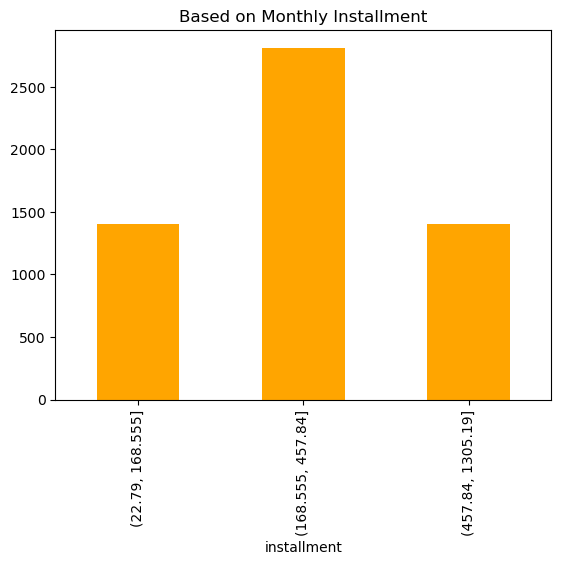

In [16]:
# creating bins for analysing the data based on monthly installment
bins = [Defaulter['installment'].quantile(0),Defaulter['installment'].quantile(0.25),Defaulter['installment'].quantile(0.75),Defaulter['installment'].quantile(1)]
installment_buckets = pd.cut(Defaulter['installment'],bins=bins).value_counts().sort_index()
installment_buckets.plot(kind='bar', color='orange')
plt.title('Based on Monthly Installment')
plt.show() 

Middle Range of Monthly installments are in credit risk

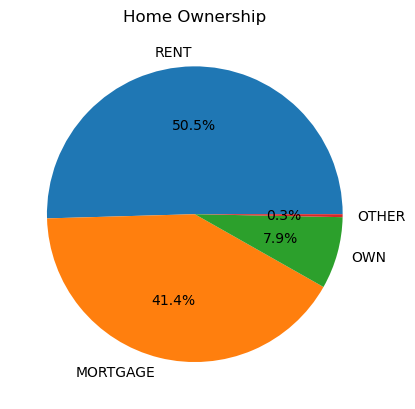

In [17]:
home_ownership = Defaulter['home_ownership'].value_counts()
plt.pie(home_ownership,labels=home_ownership.index,autopct='%1.1f%%')
plt.title('Home Ownership')
plt.show()

More defaulters stay in rented house.

## Data Analysis - Bivariate Analysis

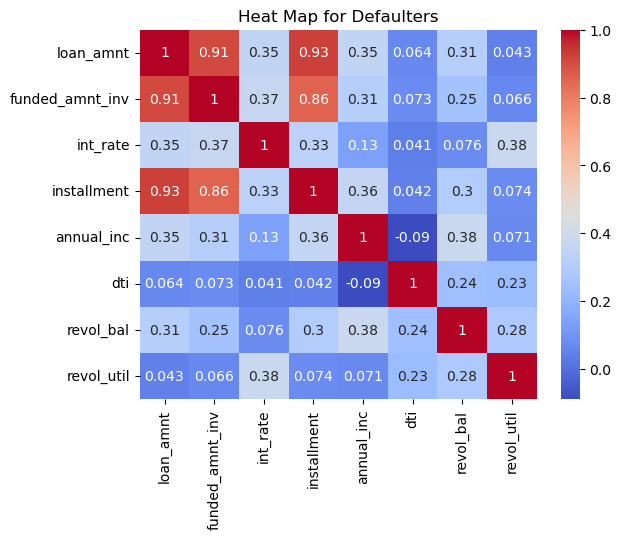

In [18]:
data = Defaulter[['loan_amnt','funded_amnt_inv', 'int_rate', 'installment','annual_inc', 'dti','revol_bal','revol_util']]
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title( "Heat Map for Defaulters" )
plt.show()

Created a Heat map with Defaulters dataframe to figure out 2 or more variables are supporting the risk of loans.

We have identified loan_amnt and installment contributes the high risk.

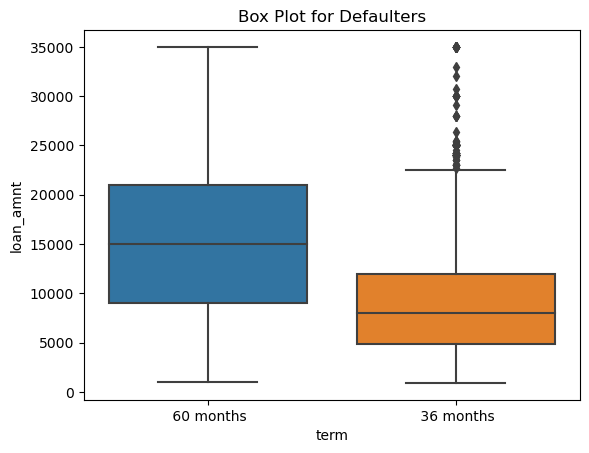

In [19]:
data = Defaulter[['loan_amnt', 'term']]
sns.boxplot(x="term", y="loan_amnt",data=data)
plt.title( "Box Plot for Defaulters" )
plt.show()

Based on the box plot we figured it out the higher the loan amount lesser the terms are at high risk.

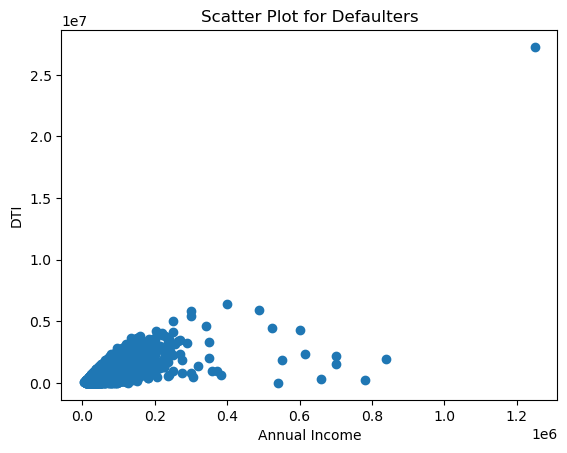

In [20]:
plt.scatter(Defaulter['annual_inc'],Defaulter['dti']* Defaulter['annual_inc'])
plt.title( "Scatter Plot for Defaulters" )
plt.xlabel("Annual Income")
plt.ylabel("DTI")
plt.show()

More defaulters belong to low dti with low income.

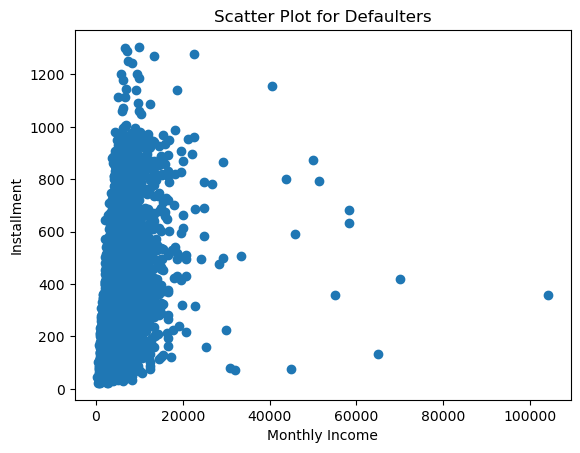

In [21]:
plt.scatter(Defaulter['annual_inc']/12,Defaulter['installment'])
plt.title( "Scatter Plot for Defaulters" )
plt.ylabel("Installment")
plt.xlabel("Monthly Income")
plt.show()

More defaulters belong to less monthly income.

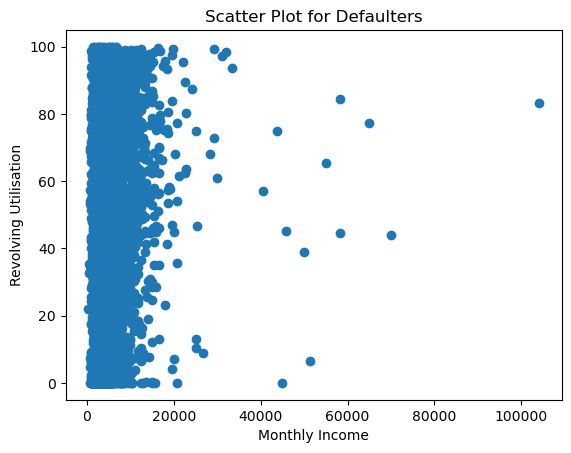

In [22]:
plt.scatter(Defaulter['annual_inc']/12,Defaulter['revol_util'])
plt.title( "Scatter Plot for Defaulters" )
plt.xlabel("Monthly Income")
plt.ylabel("Revolving Utilisation")
plt.show()

More Defaulters belong to less income.

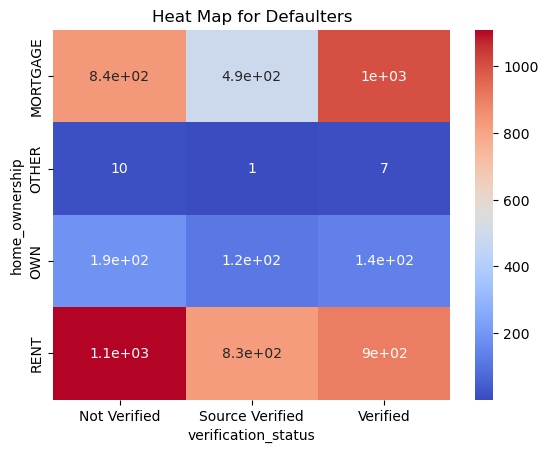

In [23]:
data = pd.crosstab(Defaulter['home_ownership'], Defaulter['verification_status'])
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title( "Heat Map for Defaulters" )
plt.show()

More Defaulters stays in rented house or mortgage property.

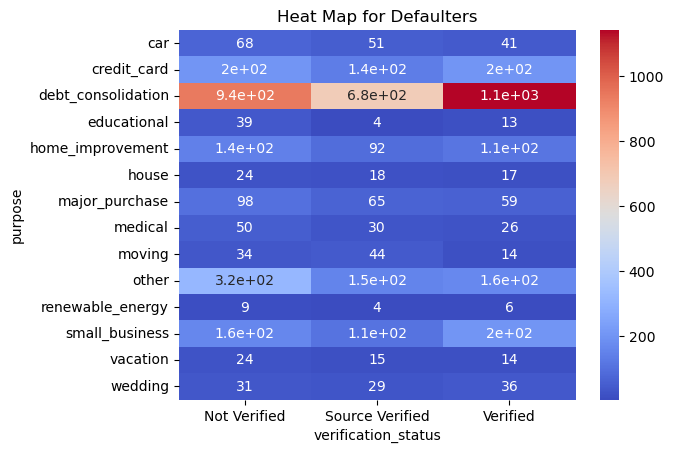

In [24]:
data = pd.crosstab(Defaulter['purpose'], Defaulter['verification_status'])
sns.heatmap(data, annot=True, cmap='coolwarm')
plt.title( "Heat Map for Defaulters" )
plt.show()

More defaulters belongs to debt_consolidation irrespective of the income verification status

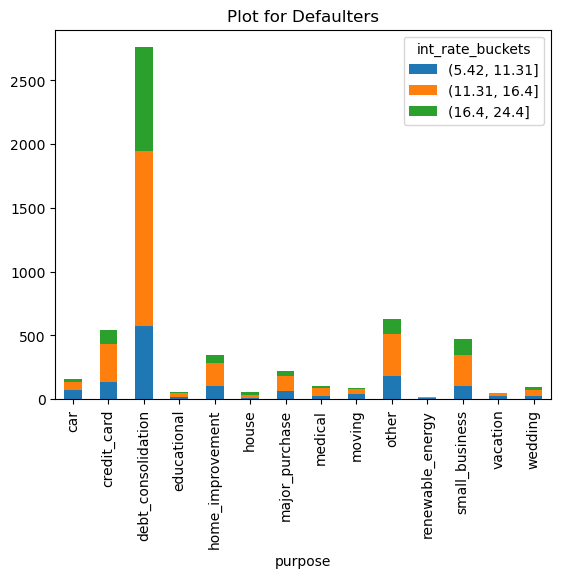

In [25]:
Defaulter.groupby(['purpose','int_rate_buckets']).size().unstack().plot(kind='bar',stacked=True)
plt.title( "Plot for Defaulters" )
plt.show()

More defaulters belong to debt_consolidation though interest rate is in middle range